In [2]:
import pandas as pd
import matplotlib.pyplot as plt

from PIL import Image
from matplotlib.lines import Line2D
from flox.flock import Flock

import sys

sys.path.append("..")
from plot_style import *

In [3]:
df = pd.read_feather("results/edge_run.rounds_10.feather")
df["training_end"] = pd.to_datetime(df.training_end, format="%H:%M:%S")
df.head()

,train/acc,train/loss,train/epoch,train/batch_idx,train/time,training_start,training_end,node/idx,node/kind,parent/idx,parent/kind,round,test/acc,test/loss,train/rel_time
0,0.03125,2.288605,0,0,2024-04-02 22:10:58.234050,2024-04-02 22:10:23.309424,2024-04-02 22:11:20.157853,worker2.1,worker,agg2,aggregator,0,0.1,2.304467,18041.431472
1,0.03125,2.300116,0,1,2024-04-02 22:10:58.247514,2024-04-02 22:10:23.309424,2024-04-02 22:11:20.157853,worker2.1,worker,agg2,aggregator,0,0.1,2.304467,18041.444936
2,0.06250,2.292505,0,2,2024-04-02 22:10:58.260596,2024-04-02 22:10:23.309424,2024-04-02 22:11:20.157853,worker2.1,worker,agg2,aggregator,0,0.1,2.304467,18041.458018
3,0.15625,2.286013,0,3,2024-04-02 22:10:58.273637,2024-04-02 22:10:23.309424,2024-04-02 22:11:20.157853,worker2.1,worker,agg2,aggregator,0,0.1,2.304467,18041.471059
4,0.09375,2.297627,0,4,2024-04-02 22:10:58.286880,2024-04-02 22:10:23.309424,2024-04-02 22:11:20.157853,worker2.1,worker,agg2,aggregator,0,0.1,2.304467,18041.484302


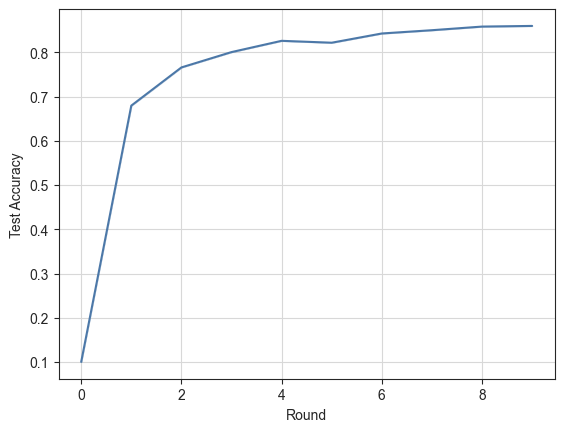

In [4]:
sns.lineplot(
    df,
    x="round",
    y="test/acc",
)
plt.xlabel("Round")
plt.ylabel("Test Accuracy")
plt.savefig("test_acc.pdf", bbox_inches="tight")
plt.show()

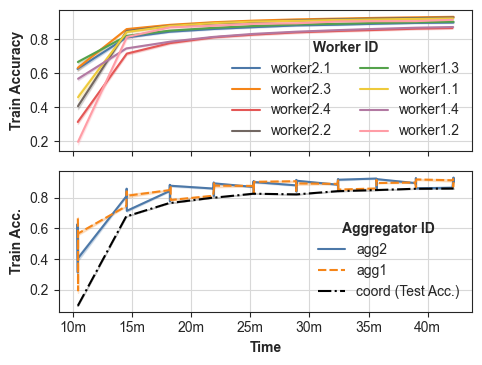

In [5]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(5, 3.75), sharex=True)

###############################################################
# Per-worker
###############################################################
i = 0
sns.lineplot(
    df,
    x="training_start",
    y="train/acc",
    hue="node/idx",
    ax=axes[i],
)

axes[i].set_xlabel("Time", weight="bold")
axes[i].set_ylabel("Train Accuracy", weight="bold")
legend = axes[i].legend(
    title="Worker ID", ncols=2, fancybox=False, edgecolor="k", frameon=False
)
plt.setp(legend.get_title(), weight="bold")

###############################################################
# Per-aggr.
###############################################################
i = 1
sns.lineplot(
    df,
    x="training_start",
    y="train/acc",
    hue="parent/idx",
    style="parent/idx",
    ax=axes[i],
)

sns.lineplot(
    df,
    x="training_start",
    y="test/acc",
    linestyle="-.",
    color="black",
    ax=axes[1]
)

#################################################################################
# Get the x-ticks and -labels and then show the labels by minute instead of date.
ticks = axes[i].get_xticks()
labels = axes[i].get_xticklabels()
labels = ["{}m".format(l.get_text().split()[-1].split(":")[-1]) for l in labels]

axes[i].set_xticks(ticks, labels, rotation=0)
axes[i].set_xlabel("Time", weight="bold")
axes[i].set_ylabel("Train Acc.", weight="bold")

handles, labels = axes[i].get_legend_handles_labels()
handles.extend([Line2D([0], [0], label="coord (Test Acc.)", color="black", linestyle="-.")])

legend = axes[i].legend(title="Aggregator ID", fancybox=False, edgecolor="k", frameon=False, handles=handles)

plt.setp(legend.get_title(), weight="bold")
axes[i].set_ylabel("Train Acc.", weight="bold")

plt.tight_layout()
plt.savefig("artifact_4.pdf", bbox_inches="tight")
plt.show()